# HW1: Practice with Python, hard-margin SVM, and linear regression

## ... your name and NetID here ...
### Waleed Almousa 
### 908 302 9414

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make an X from the wt (weight in 1000s of pounds) and mpg (miles per gallon) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

In [2]:
df=pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0)

clf.intercept_ = 32.0
clf.coef_ = -8.24(wt), -0.309(mpg)
clf.score(X, y) = training accuracy = 1.0
We predict that a car weighing 4 thousand pounds that gets 20 mpg has transmission type 0 (where 0=automatic, 1=manual)


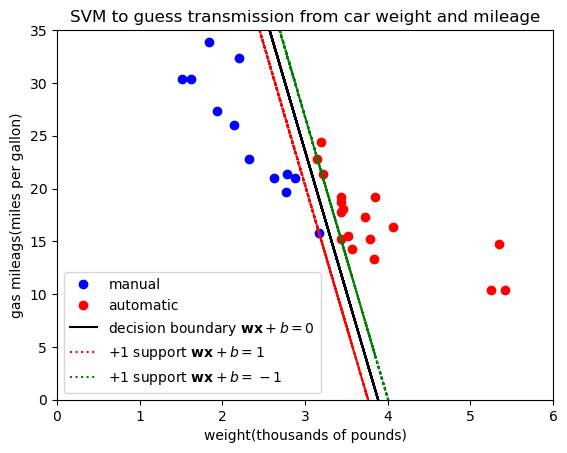

In [3]:
X=df[["wt", "mpg"]]
y=df["am"]

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
print(f'clf.intercept_ = {clf.intercept_[0]:.3}')
wt_coef=clf.coef_[0][0]
mpg_coef=clf.coef_[0][1]
print(f'clf.coef_ = {wt_coef:.3}(wt), {mpg_coef:.3}(mpg)')
print(f'clf.score(X, y) = training accuracy = {clf.score(X, y)}')

X_pred = pd.DataFrame({"wt": [4], "mpg":[20]})
print(f'We predict that a car weighing {X_pred["wt"][0]} thousand pounds that gets {X_pred["mpg"][0]} mpg has transmission type {clf.predict(X_pred)[0]} (where 0=automatic, 1=manual)')

plt.plot(df.wt[y==1], df.mpg[y==1], '.', markersize=12, color='blue', label='manual')
plt.plot(df.wt[y==0], df.mpg[y==0], '.', markersize=12, color='red', label='automatic')
plt.xlim(0, 6)
plt.ylim(0, 35)

x1=df.wt
x2=-(wt_coef*x1 +clf.intercept_)/mpg_coef
plt.plot(x1, x2, color='black',  label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(x1, x2 + 1 / mpg_coef, linestyle=':', color='red',label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(x1, x2 - 1 / mpg_coef, linestyle=':', color='green', label=r'+1 support $\mathbf{wx} + b = -1$')
plt.title("SVM to guess transmission from car weight and mileage")
plt.xlabel("weight(thousands of pounds)")
plt.ylabel("gas mileags(miles per gallon)")
plt.legend()

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

... your answer here (just give the model, $y = w x + b$, specifying its slope and intercept) ...


intercept=4.0, slope=-0.5
y = -0.5x + 4.0


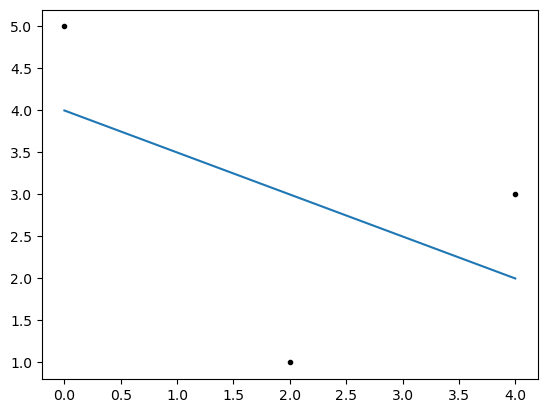

In [4]:
X=np.array([[0], [2], [4]])
y=[5, 1, 3]
x=X.reshape(-1, 1)
model=linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]

print(f'intercept={b:.3}, slope={w:.3}')
print(f'y = {w:.3}x + {b:.3}')

plt.plot(X, model.predict(X))
plt.plot(x, y, '.', color="black")



## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

In [5]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol')

Model: Volume = 2.68e-05 * (MarketCap) + 3.41e+06
R^2 is 0.705
We predict a Volume of 1.01e+07 for a company with market cap. 0.25e+12


Text(0, 0.5, 'Avg daily trading volume')

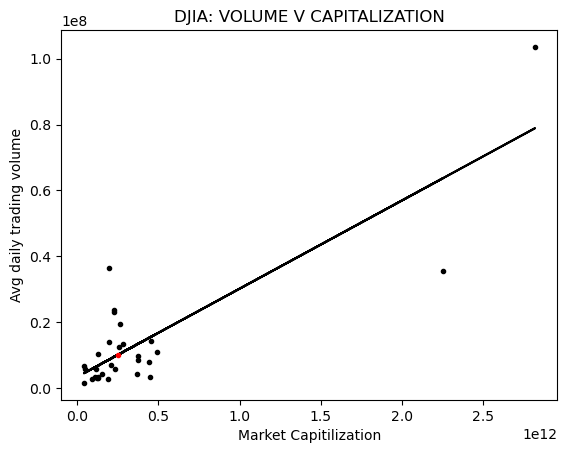

In [6]:
X = df[['MarketCap']]
y = df['AvgVol']
model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
y_hat = model.predict(X)
y_pred = model.predict(pd.DataFrame({'MarketCap': [0.25e+12]}))

print(f'Model: Volume = {w:.3} * (MarketCap) + {b:.3}')
print(f'R^2 is {model.score(X, y):.3}') 
print(f'We predict a Volume of {y_pred[0]:.3} for a company with market cap. 0.25e+12')

plt.plot(X, y, '.', color='black')
plt.plot(X, y_hat, color='black', label=f'$\\hat{{y}}=${round(b, 2)} + ({round(w, 2)})$x$')
plt.plot(0.25e+12, y_pred, '.', color='red')
plt.title('DJIA: VOLUME V CAPITALIZATION')
plt.xlabel('Market Capitilization')
plt.ylabel('Avg daily trading volume')



As Market Capitilization increases, the avg daily trading volume also increases

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [7]:

X = df[['MarketCap', 'Price']]
y = df['AvgVol']
model.fit(X, y)
b = model.intercept_
y_hat = model.predict(X)

print(f'Model: Volume = {model.coef_[0]:.3} * (MarketCap) + {model.coef_[1]:.3} * Price +{b:.3}')
print(f'R^2 is {model.score(X, y):.3}') 


Model: Volume = 2.89e-05 * (MarketCap) + -6.69e+04 * Price +1.44e+07
R^2 is 0.823


As market capitilization increases,  Volume also increases. 
As Price increases, Volume decreases.